# M² Theoretical Frameworks

**Scott Prahl**

**Sept 2023**

Real laser beams differ from perfect Gaussian beams.  Specifically, they diverge more quickly or don't focus to the same size spot.  The beam propagation factor M² is a measure of how close a beam is to Gaussian (TEM$_{00}$ mode).  

Unfortunately, there are three different theoretical frameworks to describe beam propogation that are nearly identical but with subtle differences.  This notebook attempts to describe the various frameworks and to explain how the ISO 11146 method of measuring M² relates to these frameworks.

Johnston and Sasnett write in their chapter "Characterization of Laser Beams: The M² Model" in the *Handbook of Optical and Laser Scanning*, Marcel Dekker, (2004).

> Unlike the fundamental mode beam where the 1/e²-diameter definition is universally understood and applied, for mixed modes a number of different diameter definitions have been employed. The different definitions have in common that they all reduce to the 1/e²-diameter when applied to an M²=1 fundamental mode beam, but when applied to a mixed mode with higher order mode content, they in general give different numerical values. As M² always depends on a product of two measured diameters, its numerical value changes also as the square of that for diameters. It is all the same beam, but different methods provide results in different currencies; one has to specify what currency is in use and know the exchange rate.

For more information, see

1. Ross, *Laser Beam Quality Metrics*, SPIE Press, 2013.

2. Sasnett and Johnston, Jr., “Beam characterization and measurement of propagation attributes,” in *Laser Beam Diagnostics*, **1414**, 21-32, (1991).

3. Sun, "Thin lens equation for a real laser beam with weak lens aperture truncation", *Optical Engineering*, **11**, 2906-2913, (1998).

3. Self, "Focusing of Spherical Gaussian Beams." *Applied Optics* **22**, 658, (1983).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import laserbeamsize as lbs

## M² or the beam propagation factor

M² is defined as the ratio of the beam parameter product (BPP) for a real beam to that for a perfect Gaussian (TEM$_{00}$) beam

$$
M^2 = \frac{\mathrm{BPP}}{\mathrm{BPP}_{00}} = \frac{\Theta \cdot w_0}{\Theta_{00}\cdot w_{00}}
$$

where $\Theta$ is the far-field beam divergence and $w_0$ is the minimum beam radius.  The 00 subscript indicates parameters for the TEM$_{00}$ or fundamental gaussian mode.  These are

$$
\Theta_{00} = \frac{\lambda}{\pi w_{00}}
$$

and so the beam parameter product for the TEM$_{00}$ mode is

$$
\mathrm{BPP}_{00} = \frac{\lambda}{\pi}
$$

Therefore the beam quality factor can be written

$$
M^2 =  \frac{\Theta \cdot w_0}{\lambda\cdot \pi}
$$

A Gaussian beam has $M^2=1$, while all other beams will have $M^2>1$.  Moreover,

* for a given *beam radius*, the Gaussian beam has the smallest possible beam divergence

* for a given *beam divergence*, the Gaussian beam has the smallest possible beam radius. 


## Multimode Gaussian beam propagation

The Gaussian beam propagation model is simple and widely used.  It is natural to try to leverage the same model for multimode beams by including M² as an additional parameter.

There are three common multimodal beam propagation formulations: illuminator, laboratory, or embedded Gaussian.  The reference Gaussian beam and the multimode beam can be seen to have

* **matching divergences** in the far-field for the laboratory case.

* **matching beam waists** for the illuminator case.

* **matching Rayleigh distances** for the embedded gaussian case.

These three variants are shown below.  Each multimode beam has the same value of M², but the Gaussian beam that is used as a reference has a different beam waist (and therefore different divergence as well).


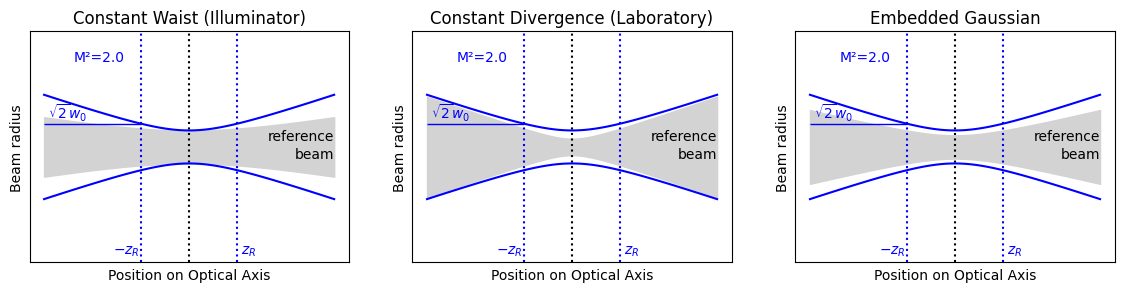

In [2]:
def add_plot_details(z0, zR, z, r, rr, M2):
    plt.fill_between(z, -rr, rr, color="lightgray")
    plt.text(z[-1], 0.04, r"reference", ha="right")
    plt.text(z[-1], -0.07, r"beam", ha="right")
    rmin = min(r) * np.sqrt(2)
    rrmin = min(rr) * np.sqrt(2)
    plt.xlabel("Position on Optical Axis")
    plt.ylabel("Beam radius")
    plt.xticks([])
    plt.yticks([])
    plt.axvline(z0 + zR, color="blue", linestyle=":")
    plt.axvline(z0 - zR, color="blue", linestyle=":")
    plt.text(z0 + zR, -0.65, " $z_R$", color="blue")
    plt.text(z0 - zR, -0.65, "$-z_R$ ", ha="right", color="blue")
    plt.axvline(z0, color="black", linestyle=":")
    plt.hlines(rmin, z[0], z0 - zR, color="blue", linewidth=1)
    #    plt.hlines(rrmin,z[0],z0-zR, color='red', linewidth=1)
    plt.text(z[0], rmin, r" $\sqrt{2}w_0$", va="bottom", color="blue")
    #    plt.text(z[0], rrmin, r'$\sqrt{2}w_0$', va='top', color='red')
    plt.ylim(-0.7, 0.7)
    plt.plot(z, +r, color="blue")
    plt.plot(z, -r, color="blue")
    plt.text(z[10], 0.5, "M²=%.1f" % M2, ha="left", va="bottom", color="blue")


M2 = 2
w0 = 0.1  # radius of beam waist [mm]
z0 = -100  # z-axis position of beam waist [mm]
lambda0 = 0.6328 / 1000  # again in mm
M = np.sqrt(M2)
zR = lbs.z_rayleigh(w0, lambda0, M2)
z = np.linspace(-3 * zR, 3 * zR, 100) - 100
r = lbs.beam_radius(w0, lambda0, z, M2=M2, z0=z0)

plt.subplots(1, 3, figsize=(14, 3))

plt.subplot(1, 3, 1)
rr = lbs.beam_radius(w0, lambda0, z, z0=z0)
add_plot_details(z0, zR, z, r, rr, M2)
plt.title("Constant Waist (Illuminator)")

plt.subplot(1, 3, 2)
rr = lbs.beam_radius(w0 / M2, lambda0, z, z0=z0)
add_plot_details(z0, zR, z, r, rr, M2)
plt.title("Constant Divergence (Laboratory)")

plt.subplot(1, 3, 3)
rr = lbs.beam_radius(w0 / M, lambda0, z, z0=z0)
add_plot_details(z0, zR, z, r, rr, M2)
plt.title("Embedded Gaussian")
plt.show()

### Illuminator or matching waist

The first is the *illuminator* or *constant waist* that is used when the the minimum beam radius $w_0$ is known.  In this case the beam radius is

$$
w_\mathrm{illuminator}^2(z)=w_{0}^2\cdot\left[1+\left(M^2 \frac{\lambda}{\pi w_{0}^2}  \right)^2 (z-z_0)^2\right] =w_{0}^2\cdot\left[ 1+ \left(\frac{z-z_0}{z_R}\right)^2\right]
$$

In this case M² represents how much a real beams diverge than a pure Gaussian beam.  We find that the beam divergence is M² times larger than that of a fundamental Gaussian beam with the same beam waist.

$$
\Theta = M^2 \Theta_{00}
$$

The beam waists match

$$
w(z_0) \equiv w_0 = w_{00}
$$

but the Rayleigh range for the real beam is shorter than the embedded Gaussian by a factor of M² (because the Gaussian diverges more slowly).

#### Relationship to ISO 11146

When one has experimental values for the beam diameters at different axial locations $z$, it is natural to express the beam size as a function of position in terms of the measured values (instead of using an unknown reference beam).  If $d_\sigma(z)$ is the beam diameter measured using the ISO 11164 method at an axial location $z$, then the general expression for the real beam diameter is (see Ross for details)

$$
d^2_\sigma(z) = d^2_\sigma(z_0) + \Theta_\sigma^2 (z-z_0)^2
$$

Since $\Theta_\sigma=d_\sigma(z_0)/z_R$

$$
d^2_\sigma(z) = d^2_\sigma(z_0)\left[ 1 + \left(\frac{z-z_0}{z_R}\right)^2\right]
$$

and therefore we obtain the same expression as above after dividing left and right sides by four.

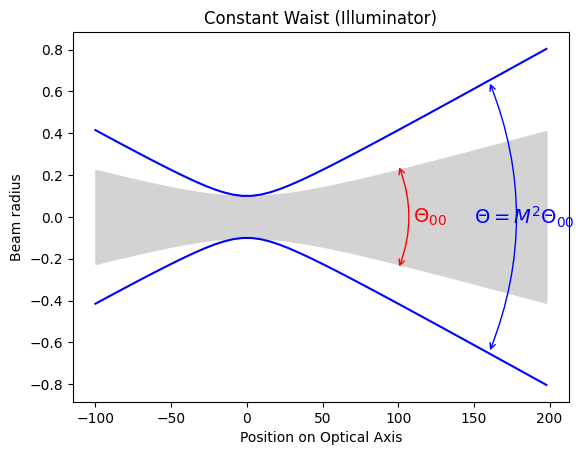

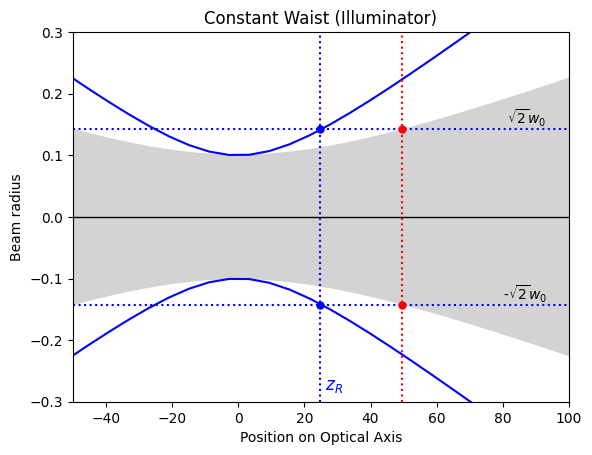

In [3]:
M2 = 2
w0 = 0.1  # radius of beam waist [mm]
lambda0 = 0.6328 / 1000  # again in mm
M = np.sqrt(M2)

zR = lbs.z_rayleigh(w0, lambda0)
z = np.linspace(0, 6 * zR) - 100
r = lbs.beam_radius(w0, lambda0, z, M2=M2)
rr = lbs.beam_radius(w0, lambda0, z)
rmin = min(r) * np.sqrt(2)

# label graph
plt.title("Constant Waist (Illuminator)")
plt.xlabel("Position on Optical Axis")
plt.ylabel("Beam radius")

# draw embedded gaussian
plt.fill_between(z, -rr, rr, color="lightgray")

# draw real beam
plt.plot(z, +r, color="blue")
plt.plot(z, -r, color="blue")

# annotate graph
plt.text(110, 0.0, r"$\Theta_{00}$", fontsize=14, va="center", color="red")
plt.annotate(
    "",
    xy=(100, 0.25),
    xytext=(100, -0.25),
    arrowprops=dict(connectionstyle="arc3,rad=0.2", arrowstyle="<->", color="red"),
)

plt.text(150, 0.0, r"$\Theta=M^2\Theta_{00}$", fontsize=14, va="center", color="blue")
plt.annotate(
    "",
    xy=(160, 0.65),
    xytext=(160, -0.65),
    arrowprops=dict(connectionstyle="arc3,rad=0.2", arrowstyle="<->", color="blue"),
)
plt.show()

# label graph
plt.title("Constant Waist (Illuminator)")
plt.xlabel("Position on Optical Axis")
plt.ylabel("Beam radius")

# plot embedded gaussian
plt.fill_between(z, -rr, rr, color="lightgray")

# plot real beam
plt.plot(z, +r, color="blue")
plt.plot(z, -r, color="blue")

# annotate Rayleigh distances
plt.axvline(zR / M2, color="blue", linestyle=":")
plt.axvline(zR, color="red", linestyle=":")
plt.text(zR / M2, -0.28, " $z_R$", color="blue", fontsize=12)
# plt.text(zR, -0.28, '$z_R$ ', color='red')
plt.axvline(z0, color="black", linewidth=1)
plt.axhline(rmin, color="blue", linestyle=":")
plt.text(80, rmin, r" $\sqrt{2}w_0$", va="bottom", color="black")
plt.axhline(-rmin, color="blue", linestyle=":")
plt.text(80, -rmin, r"-$\sqrt{2}w_0$", va="bottom", color="black")
plt.axhline(0, color="black", linewidth=1)
plt.plot([zR, zR], [rmin, -rmin], "or", markersize=5)
plt.plot([zR / M2, zR / M2], [rmin, -rmin], "ob", markersize=5)


plt.xlim(-50, 100)
plt.ylim(-0.3, 0.3)
plt.show()

### Laboratory or matching divergence

The *laboratory* or *constant divergence* version is commonly used to measure the beam parameter on the benchtop.  An auxilary lens is used to refocus the light so that a new beam waist can be measured external to the laser cavity.

$$
w_\mathrm{laboratory}^2(z)=w_{00}^2\left[M^4+\left(\frac{z-z_0}{z_{R00}}\right)^2\right]
=(w_{00}M^2)^2\left[1+\left(\frac{z-z_0}{M^2 z_{R00}}\right)^2\right]
$$

In this case M² represents how much larger the real beam waist is than the pure Gaussian beam waist.  We find that a multimode beam has a beam waist which is M² times larger than a fundamental Gaussian beam with the same beam divergence

$$
w(z_0) = M^2 \cdot w_{00}
$$

and the divergences match

$$
\Theta = \Theta_{00}
$$


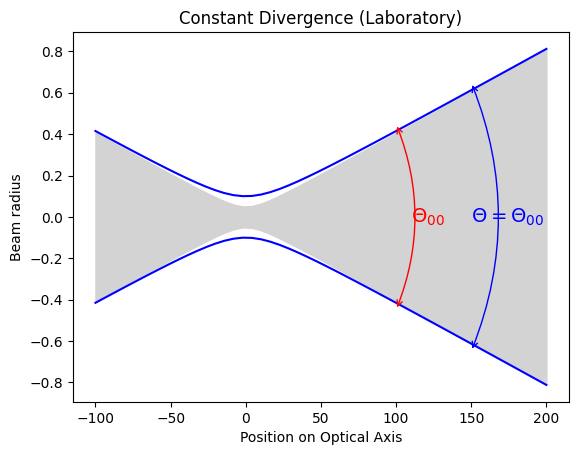

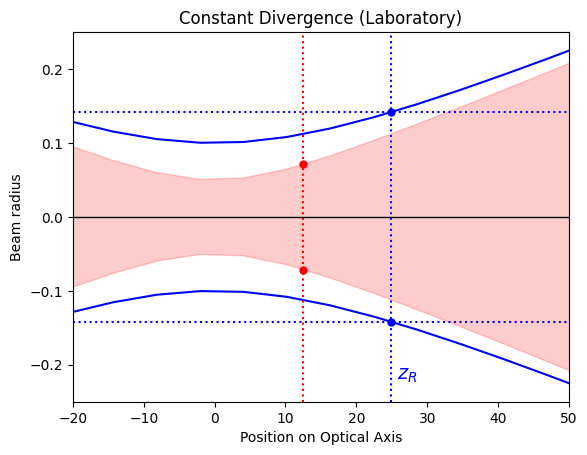

In [4]:
M2 = 2
w0 = 0.1  # radius of real beam waist [mm]
lambda0 = 0.6328 / 1000  # in mm

M = np.sqrt(M2)
zR = lbs.z_rayleigh(w0, lambda0) / M2
z = np.linspace(0, 300) - 100
r = lbs.beam_radius(w0, lambda0, z, M2=M2)
rr = lbs.beam_radius(w0 / M2, lambda0, z)

plt.title("Constant Divergence (Laboratory)")
plt.fill_between(z, -rr, rr, color="lightgray")
rmin = min(r) * np.sqrt(2)
rrmin = min(rr) * np.sqrt(2)

plt.xlabel("Position on Optical Axis")
plt.ylabel("Beam radius")
plt.plot(z, +r, color="blue")
plt.plot(z, -r, color="blue")

plt.text(110, 0.0, r"$\Theta_{00}$", fontsize=14, va="center", color="red")
plt.annotate(
    "",
    xy=(100, 0.45),
    xytext=(100, -0.45),
    arrowprops=dict(connectionstyle="arc3,rad=0.2", arrowstyle="<->", color="red"),
)

plt.text(150, 0.0, r"$\Theta=\Theta_{00}$", fontsize=14, va="center", color="blue")
plt.annotate(
    "",
    xy=(150, 0.65),
    xytext=(150, -0.65),
    arrowprops=dict(connectionstyle="arc3,rad=0.2", arrowstyle="<->", color="blue"),
)
plt.show()

# label graph
plt.title("Constant Divergence (Laboratory)")
plt.xlabel("Position on Optical Axis")
plt.ylabel("Beam radius")

# plot embedded gaussian
plt.fill_between(z, -rr, rr, color="red", alpha=0.2)

# plot real beam
plt.plot(z, +r, color="blue")
plt.plot(z, -r, color="blue")

# annotate Rayleigh distances
plt.axvline(zR, color="blue", linestyle=":")
plt.axvline(zR / M2, color="red", linestyle=":")
plt.text(zR, -0.22, " $z_R$", color="blue", fontsize=14)
# plt.text(zR/M2, -0.22, '$z_R$ ', color='red')
# plt.axvline(z0, color='black', linewidth=1)
plt.axhline(rmin, color="blue", linestyle=":")
# plt.text(40, rmin, r' $\sqrt{2}w_0$', va='bottom', color='black')
plt.axhline(-rmin, color="blue", linestyle=":")
# plt.text(40, -rmin, r'-$\sqrt{2}w_0$', va='bottom', color='black')
plt.axhline(0, color="black", linewidth=1)
plt.plot([zR / M2, zR / M2], [rrmin, -rrmin], "or", markersize=5)
plt.plot([zR, zR], [rmin, -rmin], "ob", markersize=5)


plt.xlim(-20, 50)
plt.ylim(-0.25, 0.25)
plt.show()

### Embedded Gaussian or matching Rayleigh distance

And finally, the original theoretical version that arose from integrating over various modes:

$$
w_\mathrm{theory}^2(z)=w_{00}^2M^2\left(1+\frac{(z-z_0)^2}{z_{R00}^2}\right)
$$

We find that a multimode beam has a beam waist which is $M$ times larger and a beam divergence that is $M$ times larger

$$
w(z_0) = M \cdot w_{00}
$$

and the divergences are related by

$$
\Theta = M \cdot \Theta_{00}
$$



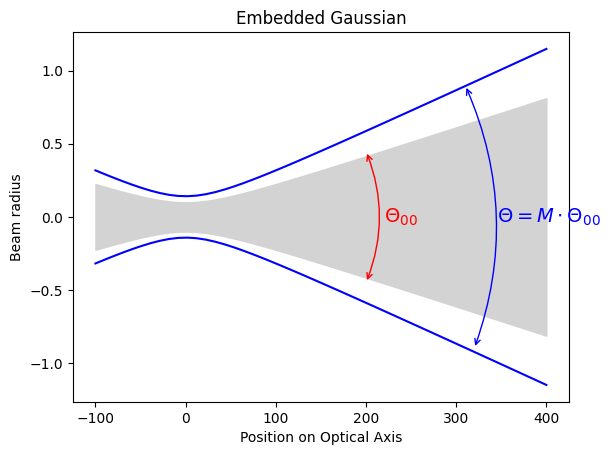

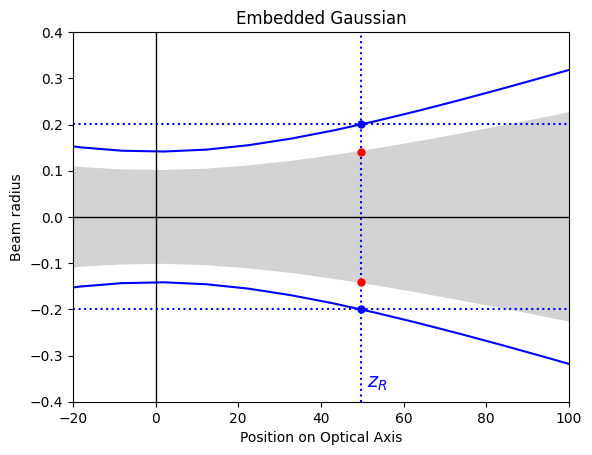

In [5]:
M2 = 2
w0 = 0.1  # radius of beam waist [mm]
z0 = 0  # z-axis position of beam waist [mm]
lambda0 = 0.6328 / 1000  # again in mm

M = np.sqrt(M2)
z = np.linspace(0, 500) - 100

r = lbs.beam_radius(w0 * M, lambda0, z, M2=M2, z0=z0)
rr = lbs.beam_radius(w0, lambda0, z, z0=z0)
zR = lbs.z_rayleigh(w0, lambda0)


plt.title("Embedded Gaussian")
plt.fill_between(z, -rr, rr, color="lightgray")
rmin = min(r) * np.sqrt(2)
rrmin = min(rr) * np.sqrt(2)

plt.xlabel("Position on Optical Axis")
plt.ylabel("Beam radius")
plt.plot(z, +r, color="blue")
plt.plot(z, -r, color="blue")

plt.text(220, 0.0, r"$\Theta_{00}$", fontsize=14, va="center", color="red")
plt.annotate(
    "",
    xy=(200, 0.45),
    xytext=(200, -0.45),
    arrowprops=dict(connectionstyle="arc3,rad=0.2", arrowstyle="<->", color="red"),
)

plt.text(345, 0.0, r"$\Theta=M\cdot\Theta_{00}$", fontsize=14, va="center", color="blue")
plt.annotate(
    "",
    xy=(310, 0.90),
    xytext=(320, -0.90),
    arrowprops=dict(connectionstyle="arc3,rad=0.2", arrowstyle="<->", color="blue"),
)
plt.show()

# label graph
plt.title("Embedded Gaussian")
plt.xlabel("Position on Optical Axis")
plt.ylabel("Beam radius")

# plot embedded gaussian
plt.fill_between(z, -rr, rr, color="lightgray")

# plot real beam
plt.plot(z, +r, color="blue")
plt.plot(z, -r, color="blue")

# annotate Rayleigh distances
plt.axvline(zR, color="blue", linestyle=":")
plt.text(zR, -0.37, " $z_R$", color="blue", fontsize=14)
plt.axvline(z0, color="black", linewidth=1)
plt.axhline(rmin, color="blue", linestyle=":")
plt.axhline(-rmin, color="blue", linestyle=":")
plt.axhline(0, color="black", linewidth=1)
plt.plot([zR, zR], [rrmin, -rrmin], "or", markersize=5)
plt.plot([zR, zR], [rmin, -rmin], "ob", markersize=5)


plt.xlim(-20, 100)
plt.ylim(-0.4, 0.4)
plt.show()

## Gaussian Beam Diameter

When one has experimental values for the beam diameters at different axial locations $z$, it is natural to express the beam size as a function of position in terms of the measured values (instead of using an unknown reference beam).  If $d_\sigma(z)$ is the beam diameter measured using the ISO 11164 method at an axial location $z$, then the general expression for the real beam diameter is

### ISO 11146-1 method for finding M²

The ISO standard suggests fitting to the hyperboloid

$$
d^2_\sigma(z) = a + bz + cz^2
$$

The location of beam waist is

$$
z_0 = -\frac{b}{2c}
$$

The diameter of beam waist is

$$
d_\sigma(z_0) = d_0 = \sqrt{\frac{4ac-b^2}{4c}}
$$

The divergence of the beam is

$$
\Theta = \sqrt{c}
$$

The Rayleigh range is

$$
z_R = \sqrt{\frac{4ac-b^2}{4c^2}}
$$

and the beam propagation factor as

$$
M^2 = \frac{\pi}{8\lambda}\sqrt{4ac-b^2}
$$

### ISO 11146 hyperboloid in normal variables

The $a + bz + cz^2$ equation can be rewritten in terms of three physical parameters: the beam waist diameter, the full divergence angle, and the axial location of the beam waist (see appendix A in Ross, 2013)

$$
d^2_\sigma(z) = d^2_0 + \Theta^2 (z-z_0)^2
$$

When $\Theta$ is expanded then the explicit dependence on M² is found to be (there is a typo in Ross)

$$
d^2_\sigma(z) = d^2_0 + \left(\frac{4\lambda M^2}{\pi d_0}\right)^2 (z-z_0)^2
$$

## Error Propagation

*More work needs to be done here.  The process that is used by `laserbeamsize` is to do a non-linear fit to find $d_0$, $z_0$, and $\Theta_0$ directly (rather than fitting for $a$, $b$, and $c$ only to then derive the parameters that are needed).*

The errors can be calculated from the errors in the fit $\Delta a$, $\Delta b$, $\Delta c$ using the standard error propagation formula

$$
(\Delta f)^2 = \left(\frac{\partial f}{\partial a} \Delta a\right)^2  + \left(\frac{\partial f}{\partial b} \Delta b \right)^2 + \left(\frac{\partial f}{\partial c} \Delta c\right)^2
$$

This leads to the error in the location of the minimum

$$
\Delta z_0 = z_0 \sqrt{\left(\frac{\Delta b}{b}\right)^2 + \left(\frac{\Delta c}{c}\right)^2}
$$

The error in the beam waist

$$
\Delta d_0 = \frac{\sqrt{(4c^2\Delta a)^2 +(2bc\Delta b)^2 + (b^2\Delta c)^2}}{8 c^2 d_0}
$$

The error in the divergence angle

$$
\Delta \Theta = \frac{\Delta c}{2\sqrt{c}}
$$

The error in the Rayleigh distance

$$
\Delta z_R = \frac{\sqrt{ (2c^2\Delta a)^2+(bc\Delta b)^2 + (b^2-2 a c)^2 (\Delta c)^2   }}{4 c^3 z_R}
$$

and the error in the beam parameter

$$
\Delta M^2 = \frac{\pi^2\sqrt{(2a\Delta c)^2+(b\Delta b)^2+(2c\Delta a)^2}}{64 \lambda^2 M^2}
$$